In [70]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [71]:
model = torch.load('../data storage/prm_data_L16_CNN.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[-0.1675,  0.0215, -0.1977],
                        [ 0.1601, -0.2187,  0.1324],
                        [-0.2083, -0.0133, -0.0651]]],
              
              
                      [[[-0.3199,  0.1628, -0.2696],
                        [ 0.2559,  0.4194, -0.0033],
                        [-0.3003,  0.0440,  0.4214]]],
              
              
                      [[[-0.2323, -0.3097, -0.1983],
                        [-0.0773, -0.1253,  0.0141],
                        [-0.2831,  0.0064,  0.1640]]],
              
              
                      [[[-0.3145, -0.0668, -0.1289],
                        [ 0.0118,  0.2332,  0.1874],
                        [ 0.2667, -0.1861, -0.2497]]],
              
              
                      [[[ 0.0071, -0.2646, -0.2409],
                        [ 0.3958,  0.4227,  0.4039],
                        [ 0.4236,  0.4436, -0.0399]]]])),
             ('fc.0.weight',
            

In [72]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[-0.1675,  0.0215, -0.1977],
          [ 0.1601, -0.2187,  0.1324],
          [-0.2083, -0.0133, -0.0651]]],


        [[[-0.3199,  0.1628, -0.2696],
          [ 0.2559,  0.4194, -0.0033],
          [-0.3003,  0.0440,  0.4214]]],


        [[[-0.2323, -0.3097, -0.1983],
          [-0.0773, -0.1253,  0.0141],
          [-0.2831,  0.0064,  0.1640]]],


        [[[-0.3145, -0.0668, -0.1289],
          [ 0.0118,  0.2332,  0.1874],
          [ 0.2667, -0.1861, -0.2497]]],


        [[[ 0.0071, -0.2646, -0.2409],
          [ 0.3958,  0.4227,  0.4039],
          [ 0.4236,  0.4436, -0.0399]]]])

In [73]:
conv1_weight.size()

torch.Size([5, 1, 3, 3])

In [74]:
# conv1_weight_flat = conv1_weight.sum(dim=(2, 3))
# print(conv1_weight_flat)

In [75]:
# conv1_weight_flat_a, index = torch.sort(conv1_weight_flat, dim=0 , descending=True)
# conv1_weight_flat_a, index

In [76]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.cpu().numpy()

横ver

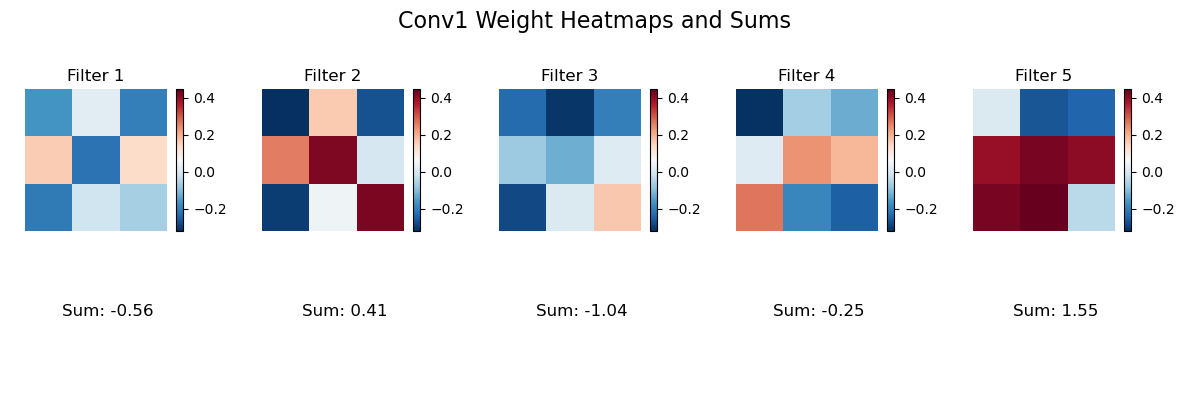

In [126]:
# # 各重みフィルターに対して成分の和を計算
# filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# # カラーマップの最小値を0以下に設定
# min_value = min(np.min(conv1_weight_np), 0)
# # 単一の最大値を取得
# max_value = np.amax(conv1_weight_np)

# # 5つの重みフィルターとその成分の和を1つの図にプロット
# plt.figure(figsize=(12, 4))
# for i in range(5):
#     plt.subplot(2, 5, i+1)
#     plt.imshow(conv1_weight_np[i, 0], cmap='RdBu_r', vmin=min_value, vmax=max_value, interpolation='nearest')
#     plt.colorbar()
#     plt.title(f'Filter {i+1}')
#     plt.axis('off')
    
#     plt.subplot(2, 5, i+6)
#     plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
#     plt.axis('off')

# plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# # 図をファイルとして保存
# plt.savefig('../image storage/L16_CNN_filter.png')
# plt.show()


縦ver

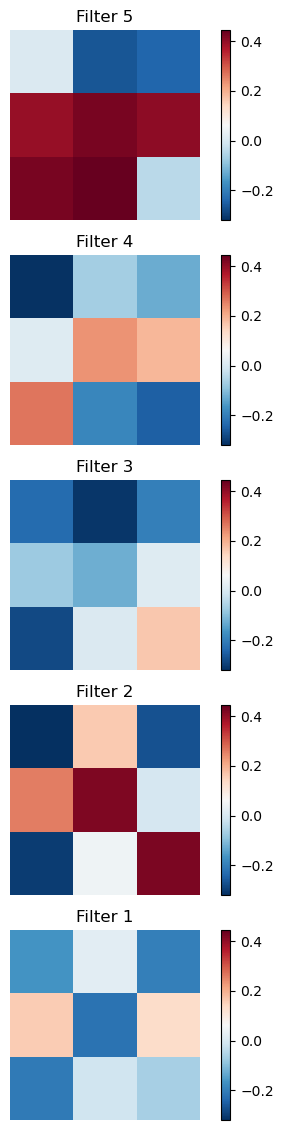

In [136]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# カラーマップの最小値を0以下に設定
min_value = min(np.min(conv1_weight_np), 0)
# 単一の最大値を取得
max_value = np.amax(conv1_weight_np)

# グリッドの行数と列数を設定
num_rows = 5
num_cols = 2

# フィギュアを作成
plt.figure(figsize=(9, 12))

for i in reversed(range(5)):
    # ヒートマップを描画
    plt.subplot(num_rows, num_cols, (4 - i) * num_cols + 1)
    plt.imshow(conv1_weight_np[i, 0], cmap='RdBu_r', vmin=min_value, vmax=max_value, interpolation='nearest')
    plt.colorbar()
    plt.title(f'Filter {i + 1}')
    plt.axis('off')

# plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# 図をファイルとして保存
plt.savefig('../image storage/L16_CNN_filter.png')
plt.show()


In [78]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[ 7.2669e-03, -3.8076e-02, -6.6712e-02,  ..., -5.6309e-02,
         -2.0412e-02, -3.7240e-02],
        [ 5.5811e-02,  5.6196e-03, -6.9034e-02,  ...,  2.5885e-02,
          4.5792e-02,  1.2803e-02],
        [-4.7186e-02,  4.0024e-02, -4.4604e-02,  ...,  2.6575e-02,
         -3.3288e-02,  8.6237e-03],
        ...,
        [-6.0602e-02,  9.1875e-05,  6.8365e-03,  ..., -1.3046e-01,
         -1.5069e-01, -9.0254e-02],
        [-6.5636e-02, -3.8902e-02,  1.6741e-02,  ..., -1.3515e-01,
         -1.2469e-01, -1.3067e-01],
        [ 1.6356e-02, -3.6989e-02,  5.9259e-02,  ..., -5.5342e-02,
         -1.3818e-01, -7.3868e-02]])

In [79]:
fc_weight.size()

torch.Size([100, 320])

In [80]:
# NumPy配列に変換
fc_weight_np = fc_weight.cpu().numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [81]:
fc_weight_np_square

array([[ 7.2669424e-03,  5.5810716e-02, -4.7185894e-02, ...,
        -6.0602326e-02, -6.5635897e-02,  1.6356159e-02],
       [-3.8076084e-02,  5.6195729e-03,  4.0024199e-02, ...,
         9.1874856e-05, -3.8901642e-02, -3.6989056e-02],
       [-6.6711791e-02, -6.9034390e-02, -4.4604424e-02, ...,
         6.8365457e-03,  1.6741337e-02,  5.9258539e-02],
       ...,
       [-5.6309357e-02,  2.5885103e-02,  2.6574740e-02, ...,
        -1.3046175e-01, -1.3515159e-01, -5.5342115e-02],
       [-2.0412391e-02,  4.5792416e-02, -3.3288144e-02, ...,
        -1.5068930e-01, -1.2469280e-01, -1.3818130e-01],
       [-3.7240162e-02,  1.2802923e-02,  8.6237164e-03, ...,
        -9.0254478e-02, -1.3066970e-01, -7.3867604e-02]], dtype=float32)

In [82]:
fc_weight_np_square.shape

(320, 100)

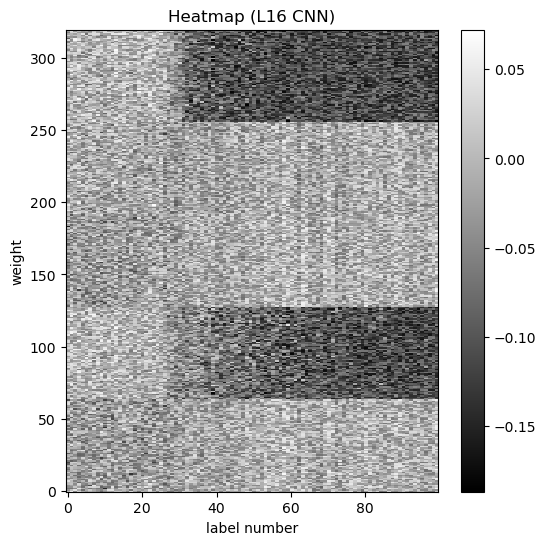

In [135]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title('Heatmap (L16 CNN)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
plt.savefig('../image storage/L16_CNN_weight.png')

plt.show()

In [84]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([ -4.4022846,  -3.3965578,  -4.4431367,  -3.3891068,  -6.7241526,
        -6.6076775,  -4.8612137,  -4.149181 ,  -5.543948 ,  -5.68877  ,
        -8.128224 ,  -4.3543844,  -6.044405 ,  -3.0476875,  -5.8835487,
        -3.2313786,  -5.195783 ,  -5.071369 ,  -7.2119074,  -4.5897155,
        -6.0927424,  -5.517376 ,  -3.373333 ,  -5.3948774,  -4.5563073,
        -3.1777346,  -8.617813 ,  -8.364714 ,  -8.095021 , -11.719486 ,
        -9.160117 , -13.008167 , -11.366953 , -11.837841 , -10.49609  ,
       -10.59967  , -13.904692 , -13.600204 , -12.249323 , -12.529947 ,
       -16.215076 , -15.7758875, -14.972498 , -15.069826 , -13.875189 ,
       -13.2863035, -13.586964 , -16.705479 , -12.051441 , -13.848724 ,
       -14.145186 , -13.596414 , -15.418314 , -11.897995 , -13.836909 ,
       -13.1321   , -13.895321 , -16.561516 , -12.551049 , -13.760468 ,
       -14.113163 , -13.840809 , -17.381464 , -12.525993 , -13.572128 ,
       -16.803299 , -17.058678 , -16.240831 , -18.617947 , -14.8

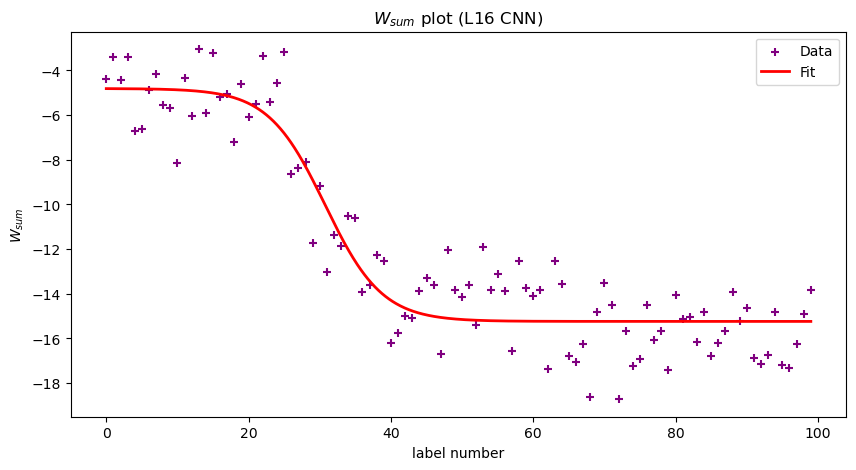

Fitted Parameters:
a: -5.214659641089219
b: 0.12480673209067428
c: -3.8375887234783996
d: -10.021582375216445


In [134]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# フィッティング用のtanh関数
def tanh_function(x, a, b, c, d):
    return a * np.tanh(b * x + c) + d

# データ
x = np.arange(len(fc_weight_np_square_sum))
y = fc_weight_np_square_sum

# tanh関数の初期推定値
initial_guess = [1.0, 0.1, 0.0, 0.0]  # パラメータ a, b, c, d の初期推定値

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y, p0=initial_guess)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple', label='Data')
plt.title('$W_{sum}$ plot (L16 CNN)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')

# フィッティング結果をプロットに追加
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = tanh_function(x_fit, *params)
plt.plot(x_fit, y_fit, 'r-', label='Fit', linewidth=2)

plt.legend()
# 図をファイルとして保存
plt.savefig('../image storage/L16_CNN_weight_sum.png')
plt.show()

# フィッティングされたパラメータ
print("Fitted Parameters:")
print("a:", params[0])
print("b:", params[1])
print("c:", params[2])
print("d:", params[3])


相転移点の算出

In [86]:
center_x = -params[2] / params[1]
print("Fitted Center X:", center_x)

beta = (0.0080808080808081 * center_x) + 0.2
print("beta:", beta)

Fitted Center X: 30.748250989300193
beta: 0.44847071506505265
